# the first Algorithm (KNN)

***le test du dataset par l'algorithme de classification KNN K-Nearest Neigboord***

In [1]:
from dataclasses import replace
from gettext import npgettext
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
pd.options.display.max_rows=3000

In [2]:
df=pd.read_csv('mobile_phonePrice.csv')
df.drop(columns=['m_dep','mobile_wt','n_cores','px_height','px_width','sc_h','sc_w','talk_time'],inplace=True)

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,pc,ram,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,2,2549,0,0,1,1
1,1021,1,0.5,1,0,1,53,6,2631,1,1,0,2
2,563,1,0.5,1,2,1,41,6,2603,1,1,0,2
3,615,1,2.5,0,0,0,10,9,2769,1,0,0,2
4,1821,1,1.2,0,13,1,44,14,1411,1,1,0,1
5,1859,0,0.5,1,3,0,22,7,1067,1,0,0,1
6,1821,0,1.7,0,4,1,10,10,3220,1,0,1,3
7,1954,0,0.5,1,0,0,24,0,700,1,1,1,0
8,1445,1,0.5,0,0,0,53,14,1099,1,0,0,0
9,509,1,0.6,1,2,1,9,15,513,1,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   ram            2000 non-null   int64  
 9   three_g        2000 non-null   int64  
 10  touch_screen   2000 non-null   int64  
 11  wifi           2000 non-null   int64  
 12  price_range    2000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 203.2 KB


In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,pc,ram,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,2,2549,0,0,1,1
1,1021,1,0.5,1,0,1,53,6,2631,1,1,0,2
2,563,1,0.5,1,2,1,41,6,2603,1,1,0,2
3,615,1,2.5,0,0,0,10,9,2769,1,0,0,2
4,1821,1,1.2,0,13,1,44,14,1411,1,1,0,1


In [6]:
X= df.iloc[: ,0:12]
Y= df.iloc[: , -1]
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,pc,ram,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,2,2549,0,0,1
1,1021,1,0.5,1,0,1,53,6,2631,1,1,0
2,563,1,0.5,1,2,1,41,6,2603,1,1,0
3,615,1,2.5,0,0,0,10,9,2769,1,0,0
4,1821,1,1.2,0,13,1,44,14,1411,1,1,0
5,1859,0,0.5,1,3,0,22,7,1067,1,0,0
6,1821,0,1.7,0,4,1,10,10,3220,1,0,1
7,1954,0,0.5,1,0,0,24,0,700,1,1,1
8,1445,1,0.5,0,0,0,53,14,1099,1,0,0
9,509,1,0.6,1,2,1,9,15,513,1,0,0


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=1,test_size=0.2)

In [8]:
print("la longueur de la base de données d’apprentissage :",len(X_train))
print("la longueur de la base de données de test :",len(X_test))

la longueur de la base de données d’apprentissage : 1600
la longueur de la base de données de test : 400


In [9]:
Sc=StandardScaler()
X_train=Sc.fit_transform(X_train)
X_test=Sc.transform(X_test)

In [10]:
print("Afficher les entrées de la base d’apprentissage")
print(X_train)
print("------------------------------------------------------------")
print("Afficher les entrées de la base de test")
print(X_test)

Afficher les entrées de la base d’apprentissage
[[-0.93181622 -0.99128795  0.84170801 ... -1.75545796 -1.02020406
   0.98634324]
 [-1.01674706  1.00878862 -0.99558096 ... -1.75545796  0.98019606
   0.98634324]
 [-0.77343166  1.00878862  1.69910954 ... -1.75545796  0.98019606
  -1.01384584]
 ...
 [-1.21644933  1.00878862  0.10679242 ...  0.56965192  0.98019606
   0.98634324]
 [ 0.63137047  1.00878862  0.35176429 ...  0.56965192  0.98019606
  -1.01384584]
 [ 0.62907504  1.00878862 -0.99558096 ...  0.56965192 -1.02020406
   0.98634324]]
------------------------------------------------------------
Afficher les entrées de la base de test
[[-0.49109398 -0.99128795  1.33165174 ...  0.56965192 -1.02020406
  -1.01384584]
 [-0.56454768  1.00878862  0.35176429 ...  0.56965192  0.98019606
  -1.01384584]
 [-1.46665102  1.00878862 -1.24055283 ...  0.56965192  0.98019606
   0.98634324]
 ...
 [ 1.45083838  1.00878862  0.35176429 ...  0.56965192 -1.02020406
  -1.01384584]
 [ 1.65054065 -0.99128795 -1.2

In [11]:
import math
from sklearn import neighbors
from sklearn.naive_bayes import BernoulliNB
k=int(math.sqrt(len(X_train)))
knn = KNeighborsClassifier(n_neighbors=k,p=2,metric='euclidean')
#classifieurBern= BernoulliNB(binarize=True)

clf_knn=knn.fit(X_train, Y_train)


predicted =knn.predict(X_test)
print(predicted)


from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

a=confusion_matrix(Y_test, predicted)
print('la matrice de confusion :',a)
#b=f1_score(Y_test, predicted)
#print('F1-score :',b)
c=accuracy_score(Y_test, predicted)
print('la précision :',c)

[0 0 0 0 2 1 0 2 1 3 0 3 0 0 2 0 0 1 1 2 3 3 0 2 3 2 2 1 1 2 1 1 2 0 3 2 0
 1 1 0 1 1 2 0 0 1 2 2 2 3 2 2 1 3 1 3 1 3 2 1 0 3 1 3 2 1 0 2 2 2 1 1 0 2
 3 1 1 2 1 0 0 3 1 2 2 1 2 0 2 0 3 0 1 1 2 2 3 0 1 2 3 2 0 2 1 0 0 1 0 3 0
 3 0 1 2 2 3 2 2 1 2 1 0 0 3 1 0 0 1 1 0 2 0 3 2 0 2 2 1 1 0 0 2 1 1 2 0 1
 0 0 2 3 0 1 1 2 1 0 3 2 2 1 3 2 3 0 3 1 3 2 3 0 2 1 0 3 3 0 1 2 0 3 0 0 1
 3 2 1 2 2 3 3 1 3 0 2 1 3 3 1 3 2 0 0 2 1 2 1 0 2 0 2 2 0 2 1 1 0 1 1 2 1
 3 1 3 3 0 2 2 1 0 1 3 3 3 0 0 1 3 0 2 3 1 2 0 0 2 0 3 3 2 1 2 0 0 2 1 2 1
 0 3 1 0 0 1 2 2 0 3 2 3 1 0 2 2 3 0 1 0 3 3 3 1 3 3 0 1 3 0 0 0 3 2 3 0 0
 2 2 3 2 0 1 0 0 3 0 2 0 0 0 2 1 3 0 0 1 2 2 3 2 3 1 1 1 2 0 1 0 2 3 2 1 2
 0 1 0 3 1 0 3 3 2 3 3 1 3 3 2 3 1 0 2 1 0 3 2 3 1 2 3 3 1 2 1 1 1 2 2 0 1
 2 2 2 0 2 3 2 0 2 2 1 2 2 3 2 0 3 2 0 1 3 3 2 0 2 1 2 3 2 0]
la matrice de confusion : [[75 16  1  0]
 [26 51 19  0]
 [ 4 27 53 22]
 [ 0  3 40 63]]
la précision : 0.605


C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


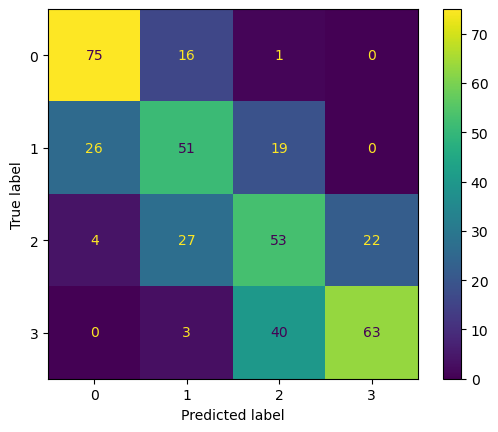

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(knn, X_test, Y_test)
plt.show()

# the second Algorithm (Naif Bayesien)

***le test du dataset par l'algorithme de classification Naif Bayesien***

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [14]:
classifieurBern= BernoulliNB(binarize=True)
classifieurMult= MultinomialNB() 
classifieurGaus= GaussianNB()

print(classifieurBern)
print(classifieurMult)
print(classifieurGaus)

BernoulliNB(binarize=True)
MultinomialNB()
GaussianNB()


In [15]:
fit1=classifieurBern.fit(X_train,Y_train)
#fit2=classifieurMult.fit(X_train,Y_train) /// ne vas pas etre fonctionne puisque
#                                        ///il y on a des entrées qui ont des valeurs négatives
fit3=classifieurGaus.fit(X_train,Y_train)
print(fit1)
#print(fit2)
print(fit3)

BernoulliNB(binarize=True)
GaussianNB()


In [16]:
pred1=classifieurBern.predict(X_test)
#pred2=classifieurMult.predict(x_test)
pred3=classifieurGaus.predict(X_test)
print(pred1)
#print(pred2)
print(pred3)

[0 0 0 0 3 1 0 1 0 3 1 3 1 0 3 1 0 0 1 0 3 3 0 0 3 0 0 0 0 0 1 0 0 0 3 3 0
 0 0 0 0 1 0 0 0 0 3 0 1 1 0 3 0 3 0 3 0 3 3 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 3 0 1 0 1 0 0 3 0 0 3 0 3 0 1 0 1 1 0 0 1 0 3 0 1 3 3 0 1 0 1 0 0 1 0 1 0
 3 1 0 1 0 3 1 0 0 1 0 1 1 3 1 0 1 0 1 0 3 0 3 3 0 3 0 1 1 0 0 1 0 1 3 0 0
 1 0 3 3 0 0 0 1 1 0 1 1 3 1 3 1 3 0 1 1 3 0 0 0 1 0 1 3 3 0 0 0 1 3 1 0 0
 3 0 1 0 1 1 0 1 0 0 1 1 3 3 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0
 1 1 3 3 1 1 0 1 0 0 3 3 0 0 0 1 1 1 1 3 0 1 0 0 0 1 3 3 3 1 0 0 0 0 0 3 0
 0 3 0 0 0 0 0 0 0 0 0 1 0 0 1 1 3 0 1 0 0 3 0 0 1 1 1 1 3 0 1 0 3 1 3 0 0
 1 1 3 0 0 0 1 1 3 0 0 0 0 0 1 0 0 1 0 1 1 1 3 3 3 0 1 0 1 0 0 1 0 3 3 0 1
 0 0 0 1 0 0 3 1 0 1 3 0 0 3 0 3 1 1 3 0 1 3 0 3 0 3 3 3 1 3 0 0 1 1 3 0 1
 3 3 0 0 0 3 3 0 0 0 1 3 1 3 3 0 1 0 0 0 3 3 0 0 3 0 3 3 1 0]
[0 0 1 0 3 1 1 2 2 3 0 3 1 1 3 0 1 1 1 2 3 3 1 2 3 2 2 2 2 2 2 1 2 0 3 3 0
 0 1 0 1 0 2 1 0 1 3 2 2 2 2 3 1 3 2 3 2 3 3 1 0 2 1 3 1 2 1 2 3 2 1 2 0 2
 3 1 2 1 0 0 0 3 2 2 3 2 3 0 2 1 3 0 1

In [17]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
a=confusion_matrix(Y_test,pred1)
print('la matrice de confusion :',a)
#b=f1_score(Y_test, pred1) il ne peut pas calculer 
##le score puisque il y on a bcp de classe dans la sortie
#print('F1-score :',b)
c=accuracy_score(Y_test, pred1)
print('la précision :',c)

la matrice de confusion : [[64 28  0  0]
 [63 33  0  0]
 [53 39  0 14]
 [14 18  0 74]]
la précision : 0.4275


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


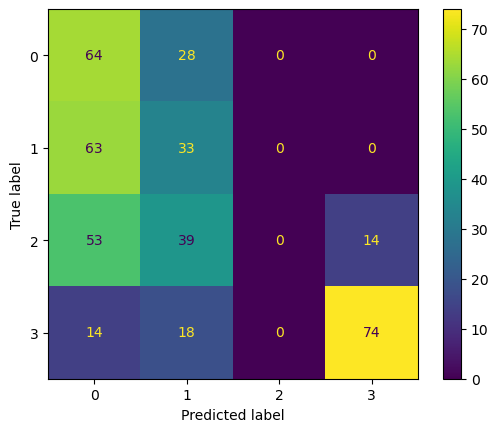

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifieurBern, X_test, Y_test)
plt.show()

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


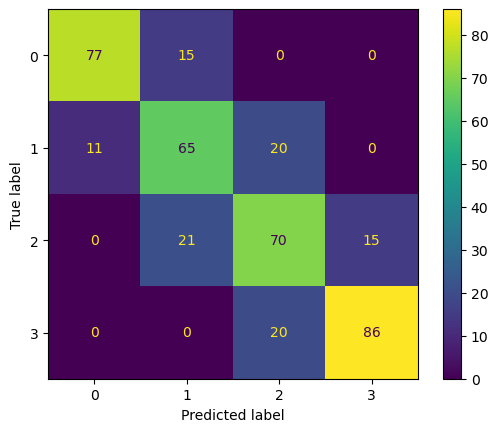

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(classifieurGaus, X_test, Y_test)
plt.show()

# the third Algorithm (Decision Tree)

***le test du dataset par l'algorithme de classification Decision tree***

In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [21]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
pc                 int64
ram                int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [22]:
clf_decision=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [23]:
clf_decision.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [24]:
predictions=clf_decision.predict(X_test)
predictions

array([0, 1, 1, 0, 3, 1, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 1, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 0, 3, 3, 0, 0, 1, 1, 1, 0, 2, 1,
       0, 1, 3, 2, 1, 2, 2, 3, 1, 3, 2, 3, 2, 3, 3, 1, 0, 2, 1, 3, 1, 2,
       1, 2, 3, 2, 1, 2, 0, 2, 3, 1, 2, 1, 0, 0, 0, 3, 2, 2, 3, 2, 3, 1,
       1, 1, 2, 0, 1, 1, 1, 3, 3, 0, 2, 3, 3, 3, 0, 2, 2, 1, 1, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 1, 1, 0, 0, 2, 1, 0, 3, 1, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 0, 0, 3, 3, 3, 1, 2, 2, 2, 3, 1, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 1, 2, 2, 0, 1, 2, 3, 3, 2, 1, 0, 1, 2, 1, 2, 3,
       2, 2, 0, 1, 2, 0, 3, 3, 3, 0, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 3, 0, 3, 2, 2, 1, 0, 1, 2, 3, 1, 1, 0, 3, 3, 2, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 1, 1, 3, 3, 2, 1,

In [25]:
a=confusion_matrix(Y_test, predictions)
print('la matrice de confusion :',a)
b=accuracy_score(Y_test, predictions)
print('la précision :',b)


la matrice de confusion : [[71 21  0  0]
 [ 9 74 13  0]
 [ 0 21 64 21]
 [ 0  0 20 86]]
la précision : 0.7375


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


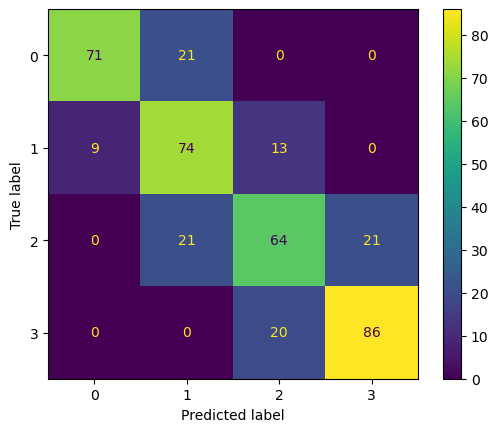

la présision est: 0.7375


In [27]:
import matplotlib.pyplot as mpl
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_decision, X_test, Y_test)
mpl.show()
print("la présision est:",b)

In [28]:
rapport=classification_report(Y_test,predictions)
rapport

'              precision    recall  f1-score   support\n\n           0       0.89      0.77      0.83        92\n           1       0.64      0.77      0.70        96\n           2       0.66      0.60      0.63       106\n           3       0.80      0.81      0.81       106\n\n    accuracy                           0.74       400\n   macro avg       0.75      0.74      0.74       400\nweighted avg       0.75      0.74      0.74       400\n'

In [29]:
r=export_text(clf_decision)
r

'|--- feature_8 <= 0.11\n|   |--- feature_8 <= -0.91\n|   |   |--- class: 0\n|   |--- feature_8 >  -0.91\n|   |   |--- class: 1\n|--- feature_8 >  0.11\n|   |--- feature_8 <= 0.82\n|   |   |--- class: 2\n|   |--- feature_8 >  0.82\n|   |   |--- class: 3\n'

[Text(0.5, 0.8333333333333334, 'ram <= 0.112\nentropy = 2.0\nsamples = 1600\nvalue = [408, 404, 394, 394]\nclass = 0'),
 Text(0.25, 0.5, 'ram <= -0.905\nentropy = 1.369\nsamples = 849\nvalue = [408, 355, 86, 0]\nclass = 0'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.525\nsamples = 380\nvalue = [335, 45, 0, 0]\nclass = 0'),
 Text(0.375, 0.16666666666666666, 'entropy = 1.261\nsamples = 469\nvalue = [73, 310, 86, 0]\nclass = 1'),
 Text(0.75, 0.5, 'ram <= 0.824\nentropy = 1.273\nsamples = 751\nvalue = [0, 49, 308, 394]\nclass = 3'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.152\nsamples = 338\nvalue = [0, 49, 241, 48]\nclass = 2'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.64\nsamples = 413\nvalue = [0, 0, 67, 346]\nclass = 3')]

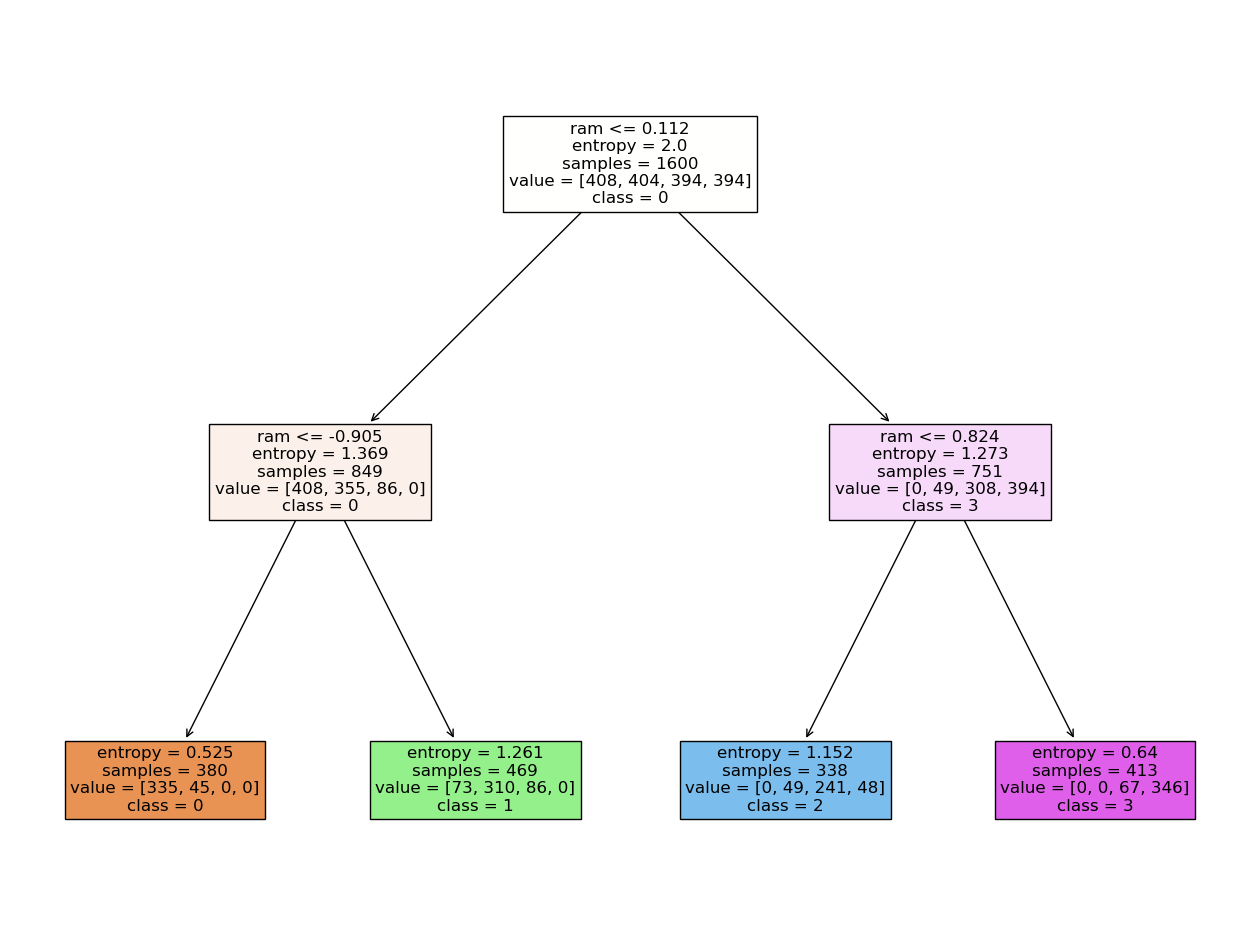

In [30]:
mpl.figure(figsize=(16,12))
plot_tree(clf_decision,feature_names=df.columns,fontsize=12,filled=True,class_names=['0','1','2','3'])

# the fourth Algorithm (Random Forest)

***le test du dataset par l'algorithme de classification Random Forest***

In [31]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sklearn
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [32]:

clf_random=RandomForestClassifier(n_estimators=50)

In [33]:
clf_random.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=50)

In [34]:
predictions_forest=clf_random.predict(X_test)
predictions_forest

array([0, 1, 1, 0, 3, 1, 0, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 2, 1, 2, 1, 1, 2, 0, 3, 3, 0, 0, 1, 0, 1, 0, 2, 1,
       0, 1, 2, 2, 1, 2, 2, 3, 1, 3, 2, 3, 1, 3, 2, 1, 0, 2, 1, 3, 2, 2,
       1, 2, 2, 2, 1, 2, 0, 2, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 2, 2, 3, 0,
       1, 1, 3, 0, 1, 1, 1, 3, 3, 0, 2, 3, 3, 2, 0, 1, 2, 0, 0, 1, 0, 3,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 1, 1, 0, 0, 3, 1, 0, 3, 0, 1, 0, 1, 3, 3, 2, 1,
       0, 1, 1, 0, 3, 1, 3, 1, 3, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 1, 0, 3,
       3, 0, 1, 2, 0, 3, 0, 0, 3, 3, 3, 1, 2, 2, 2, 2, 1, 3, 0, 1, 2, 3,
       3, 1, 2, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 3, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 0, 2, 1, 3, 3, 1, 2, 2, 1, 0, 2, 3, 3, 2, 1, 0, 1, 2, 1, 3, 2,
       2, 2, 1, 1, 2, 0, 3, 3, 3, 0, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 0, 0, 1, 2, 3, 0, 1, 0, 2, 3, 1, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 3, 3, 2, 1,

In [35]:

a=confusion_matrix(Y_test, predictions_forest)
print('la matrice de confusion :',a)
b=accuracy_score(Y_test, predictions_forest)
print('la précision :',b)

la matrice de confusion : [[84  8  0  0]
 [10 76 10  0]
 [ 0 23 66 17]
 [ 0  0 27 79]]
la précision : 0.7625


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


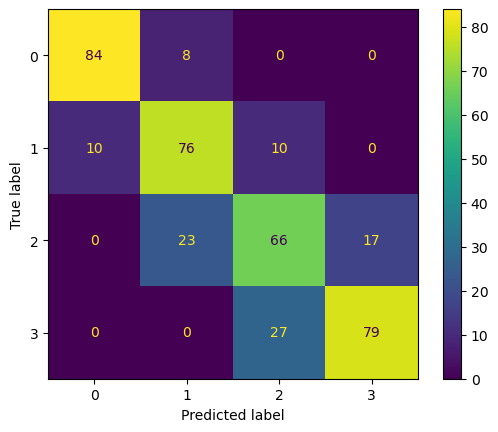

la présision est: 0.7625


In [36]:
import matplotlib.pyplot as mpl
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_random, X_test, Y_test)
mpl.show()
print("la présision est:",b)

In [37]:
rapport=classification_report(Y_test,predictions_forest)
rapport

'              precision    recall  f1-score   support\n\n           0       0.89      0.91      0.90        92\n           1       0.71      0.79      0.75        96\n           2       0.64      0.62      0.63       106\n           3       0.82      0.75      0.78       106\n\n    accuracy                           0.76       400\n   macro avg       0.77      0.77      0.77       400\nweighted avg       0.76      0.76      0.76       400\n'

In [38]:
clf_random2=RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5, n_estimators=50, oob_score=True)

In [39]:
clf_random2.fit(X_train,Y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=42)

In [40]:
clf_random2.oob_score

True

In [41]:
clf_random3=RandomForestClassifier(random_state=42, n_jobs=-1)
clf_random3.fit(X_train,Y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [42]:
from sklearn.model_selection import GridSearchCV
parametres = {'max_depth': [2,3,5,10,20],'min_samples_leaf': [5,10,20,50,100,200],'n_estimators': [10,25,30,50,100,200]}

In [43]:
clf_random4=GridSearchCV(estimator=clf_random3, param_grid=parametres, cv = 4, n_jobs=-1, verbose=1, scoring="accuracy")

In [44]:
clf_random4.fit(X_train,Y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [45]:
clf_random4.best_score_

0.81

In [46]:
c=clf_random4.best_estimator_

[Text(0.547578125, 0.9615384615384616, 'battery_power <= 0.048\ngini = 0.75\nsamples = 1010\nvalue = [396, 392, 396, 416]\nclass = 3'),
 Text(0.32203125, 0.8846153846153846, 'pc <= 1.26\ngini = 0.743\nsamples = 516\nvalue = [239, 203, 213, 149]\nclass = 0'),
 Text(0.19072916666666667, 0.8076923076923077, 'clock_speed <= 0.535\ngini = 0.741\nsamples = 454\nvalue = [217, 173, 197, 126]\nclass = 0'),
 Text(0.06854166666666667, 0.7307692307692307, 'ram <= -0.564\ngini = 0.735\nsamples = 292\nvalue = [147, 118, 111, 70]\nclass = 0'),
 Text(0.013333333333333334, 0.6538461538461539, 'ram <= -0.798\ngini = 0.157\nsamples = 102\nvalue = [138, 13, 0, 0]\nclass = 0'),
 Text(0.006666666666666667, 0.5769230769230769, 'gini = 0.0\nsamples = 81\nvalue = [121, 0, 0, 0]\nclass = 0'),
 Text(0.02, 0.5769230769230769, 'touch_screen <= -0.02\ngini = 0.491\nsamples = 21\nvalue = [17, 13, 0, 0]\nclass = 0'),
 Text(0.013333333333333334, 0.5, 'pc <= 0.104\ngini = 0.432\nsamples = 12\nvalue = [13, 6, 0, 0]\ncla

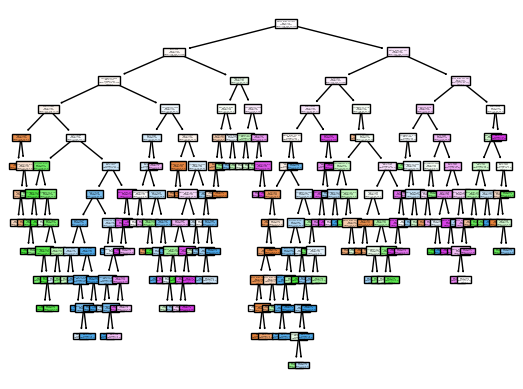

In [47]:
elem=c.estimators_[10]
a=plot_tree(elem,feature_names=X.columns, class_names=['0', '1', '2','3'],filled=True)
a

In [48]:
importances = c.feature_importances_
importances

array([0.10453774, 0.00966435, 0.03662759, 0.00844383, 0.03310151,
       0.00863673, 0.04893442, 0.03438222, 0.68976206, 0.00701212,
       0.0103738 , 0.00852362])

# the last Algorithm (SVM)

***le test du dataset par l'algorithme de classification SVM***

In [49]:
from sklearn import svm
from sklearn.svm import SVC

In [50]:
training,test=train_test_split(df,random_state=42,test_size=0.2)
X_train=training.drop('price_range',axis=1)

Y_train=training.price_range


X_test=test.drop('price_range',axis=1)

Y_test=test.price_range

In [51]:
nonlinear_clf = svm.SVC(kernel='rbf', C=1.0, gamma='auto')

In [52]:
nonlinear_clf.fit(X_train,Y_train)

SVC(gamma='auto')

In [53]:
predictions_svm=nonlinear_clf.predict(X_test)
predictions

array([0, 1, 1, 0, 3, 1, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 1, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 3, 0, 3, 3, 0, 0, 1, 1, 1, 0, 2, 1,
       0, 1, 3, 2, 1, 2, 2, 3, 1, 3, 2, 3, 2, 3, 3, 1, 0, 2, 1, 3, 1, 2,
       1, 2, 3, 2, 1, 2, 0, 2, 3, 1, 2, 1, 0, 0, 0, 3, 2, 2, 3, 2, 3, 1,
       1, 1, 2, 0, 1, 1, 1, 3, 3, 0, 2, 3, 3, 3, 0, 2, 2, 1, 1, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 1, 1, 0, 0, 2, 1, 0, 3, 1, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 0, 0, 3, 3, 3, 1, 2, 2, 2, 3, 1, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 1, 2, 2, 0, 1, 2, 3, 3, 2, 1, 0, 1, 2, 1, 2, 3,
       2, 2, 0, 1, 2, 0, 3, 3, 3, 0, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 3, 0, 3, 2, 2, 1, 0, 1, 2, 3, 1, 1, 0, 3, 3, 2, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 1, 1, 3, 3, 2, 1,

In [54]:
test['Prediction']=predictions_svm
test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,pc,ram,three_g,touch_screen,wifi,price_range,Prediction
1860,1646,0,2.5,0,3,1,25,5,686,1,1,0,0,1
353,1182,0,0.5,0,7,1,8,16,2563,1,0,0,2,1
1333,1972,0,2.9,0,9,0,14,18,1316,1,1,0,1,1
905,989,1,2.0,0,4,0,17,19,3892,1,1,0,3,1
1289,615,1,0.5,1,7,0,58,8,1906,1,0,0,1,1
1273,627,1,1.6,1,3,1,12,17,2476,1,0,0,1,1
938,894,0,0.9,0,5,1,54,15,2829,1,0,1,2,1
1731,1066,0,3.0,1,6,1,5,7,1044,1,0,0,0,1
65,616,0,1.9,1,13,1,44,17,3366,1,1,0,3,1
1323,712,0,0.5,0,6,0,27,11,2001,1,1,1,1,1


la matrice de confusion : [[  0 105   0   0]
 [  0  91   0   0]
 [  0  92   0   0]
 [  0 112   0   0]]
la précision : 0.2275


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


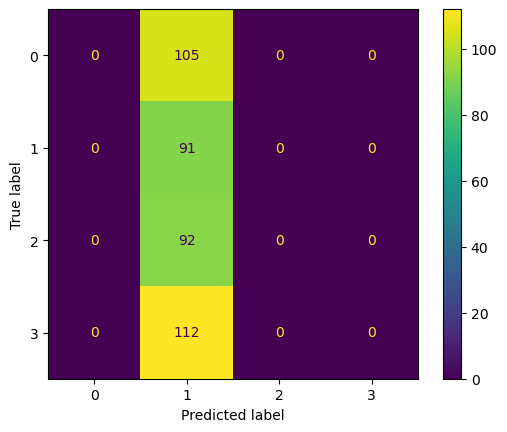

In [55]:
from sklearn.metrics import plot_confusion_matrix
a=confusion_matrix(Y_test, predictions_svm)
print('la matrice de confusion :',a)

b=accuracy_score(Y_test, predictions_svm)
print('la précision :',b)
plot_confusion_matrix(nonlinear_clf, X_test, Y_test)
mpl.show()

In [56]:
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
encoder= LabelEncoder()
Y_train=encoder.fit_transform(Y_train)
Y_train

array([1, 2, 0, ..., 2, 3, 1], dtype=int64)

In [57]:
clf_svm=svm.SVC(kernel='rbf',random_state=1,C=1.0, gamma='auto')

In [60]:
#x_train=x_train.reshape(-1,1)
#y_train=y_train.values.reshape(-1,1)
clf_svm.fit(X_train,Y_train)

SVC(gamma='auto', random_state=1)

In [62]:


#mpl.figure(figsize=(7,7))
#x_set,y_set = X_train,Y_train
#x1,x2 = np.meshgrid(np.arange(start=x_set.iloc[:,0].min()-1,stop = x_set.iloc[:,0].max()+1,step = 0.01),np.arange(start = x_set.iloc[:,1].min()-1, stop = x_set.iloc[:,1].max()+1, step = 0.01))
#x3,x4=np.meshgrid(np.arange(start=x_set.iloc[:,2].min()-1,stop = x_set.iloc[:,2].max()+1,step = 0.01),np.arange(start = x_set.iloc[:,3].min()-1, stop = x_set.iloc[:,3].max()+1, step = 0.01))
#x5,x6=np.meshgrid(np.arange(start=x_set.iloc[:,4].min()-1,stop = x_set.iloc[:,4].max()+1,step = 0.01),np.arange(start = x_set.iloc[:,5].min()-1, stop = x_set.iloc[:,5].max()+1, step = 0.01))
#x7,x8=np.meshgrid(np.arange(start=x_set.iloc[:,6].min()-1,stop = x_set.iloc[:,7].max()+1,step = 0.01),np.arange(start = x_set.iloc[:,8].min()-1, stop = x_set.iloc[:,8].max()+1, step = 0.01))
#x9,x10=np.meshgrid(np.arange(start=x_set.iloc[:,9].min()-1,stop = x_set.iloc[:,9].max()+1,step = 0.01),np.arange(start = x_set.iloc[:,10].min()-1, stop = x_set.iloc[:,10].max()+1, step = 0.01))
#x11,x12=np.meshgrid(np.arange(start=x_set.iloc[:,11].min()-1,stop = x_set.iloc[:,11].max()+1,step = 0.01),np.arange(start = x_set.iloc[:,-1].min()-1, stop = x_set.iloc[:,-1].max()+1, step = 0.01))
#plt.contourf(x1, x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12, clf_svm.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape), 
#alpha = 0.75, cmap = ListedColormap(('black','white')))
#plt.xlim(x1.min(), x1.max())
#plt.ylim(x2.min(), x2.max())
#for i, j in enumerate(np.unique(y_set)):
  #  plt.scatter(x_set.iloc[y_set == j, 0],x_set.iloc[y_set == j, 1],c =ListedColormap(('red', 'orange'))(i),label = j)
    
#plt.xlabel('Weight')
#plt.ylabel('Size')
#plt.title('hahahahah')
#plt.legend()
#plt.show()